Link: https://medium.com/swlh/introduction-to-reinforcement-learning-coding-sarsa-part-4-2d64d6e37617

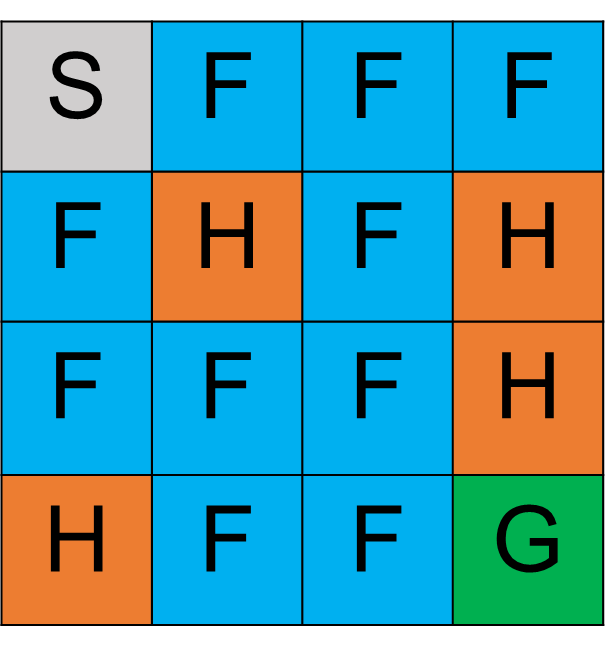

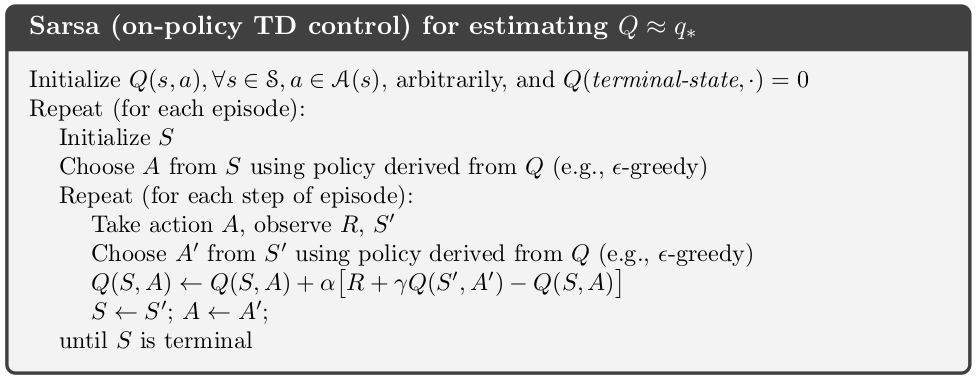

In [ ]:
import gym
import numpy as np
import time, pickle, os

env = gym.make('FrozenLake-v0')

epsilon = 0.9
# min_epsilon = 0.1
# max_epsilon = 1.0
# decay_rate = 0.01

total_episodes = 10000
max_steps = 100

lr_rate = 0.81
gamma = 0.96

Q = np.zeros((env.observation_space.n, env.action_space.n))
    
def choose_action(state):
	action=0
	if np.random.uniform(0, 1) < epsilon:
		action = env.action_space.sample()
	else:
		action = np.argmax(Q[state, :])
	return action

def learn(state, state2, reward, action, action2):
	predict = Q[state, action]
	target = reward + gamma * Q[state2, action2]
	Q[state, action] = Q[state, action] + lr_rate * (target - predict)

# Start
rewards=0

for episode in range(total_episodes):
	t = 0
	state = env.reset()
	action = choose_action(state)
    
	while t < max_steps:
		env.render()

		state2, reward, done, info = env.step(action)

		action2 = choose_action(state2)

		learn(state, state2, reward, action, action2)

		state = state2
		action = action2

		t += 1
		rewards+=1

		if done:
			break
  # epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode) 
  # os.system('clear')
		time.sleep(0.1)

    
print ("Score over time: ", rewards/total_episodes)
print(Q)

with open("frozenLake_qTable_sarsa.pkl", 'wb') as f:
	pickle.dump(Q, f)